In [142]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

%matplotlib inline 

In [143]:
%run bluetooth_adjacent_one_user_at_a_time.py 

Processing user 28b76d7b7879d364321f164df5169f
Processing user b600d2468831e0b3480a69af903dfc
Processing user f41c375b5c87d3593b963b49a3f9a3
Processing user dbbf1adb3264464838b938429d674b
28b76d7b7879d364321f164df5169f fraction of non-nulls: 0.0855716021055473
28b76d7b7879d364321f164df5169f number of of non-nulls: 634
b600d2468831e0b3480a69af903dfc fraction of non-nulls: 0.07473397673843109
b600d2468831e0b3480a69af903dfc number of of non-nulls: 604
dbbf1adb3264464838b938429d674b fraction of non-nulls: 0.059622268855696825
dbbf1adb3264464838b938429d674b number of of non-nulls: 483
f41c375b5c87d3593b963b49a3f9a3 fraction of non-nulls: 0.06173105978847399
f41c375b5c87d3593b963b49a3f9a3 number of of non-nulls: 572


TypeError: can't serialize {'89bcd6850fda4863c29a652250d4a5d58215af544b91fef109ddf3b34b98e43b'}

In [147]:
grouped_df.scanned_user.map()

TypeError: 'float' object is not iterable

In [108]:
r0 = grouped_res[list(grouped_res.keys())[0]] 
r1 = grouped_res[list(grouped_res.keys())[1]] 
r2 = grouped_res[list(grouped_res.keys())[2]] 
r3 = grouped_res[list(grouped_res.keys())[3]] 

In [109]:
grp0, var0 = r0
grp1, var1 = r1
grp2, var2 = r2
grp3, var3 = r3

In [45]:
grp0.shape, type(grp0)

((7409, 1), pandas.core.frame.DataFrame)

In [46]:
var0.shape, type(var0) 

((51,), pandas.core.series.Series)

In [47]:
var0.head() 

252    100463
205     84845
135     83696
87      75737
71      75169
dtype: int64

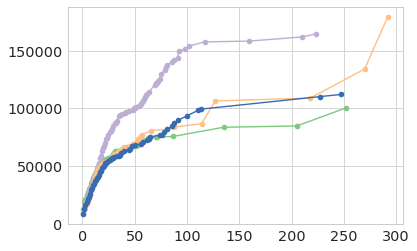

In [65]:
fig, ax = plt.subplots()
var0.plot(style='o-', ax=ax)
var1.plot(style='o-', ax=ax)
var2.plot(style='o-', ax=ax)
var3.plot(style='o-', ax=ax)

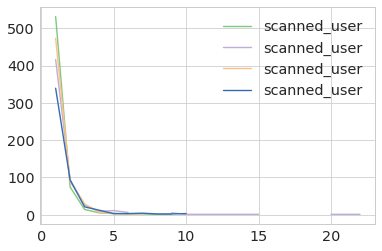

In [72]:
pd.DataFrame([grp0.scanned_user.map(lambda el: 0 if pd.isna(el) else len(el)).value_counts().sort_index(),
grp1.scanned_user.map(lambda el: 0 if pd.isna(el) else len(el)).value_counts().sort_index(),
grp2.scanned_user.map(lambda el: 0 if pd.isna(el) else len(el)).value_counts().sort_index(),
grp3.scanned_user.map(lambda el: 0 if pd.isna(el) else len(el)).value_counts().sort_index()]).T.iloc[1:, :].plot() 

In [100]:
pd.concat([grp0, grp1]).index.get_level_values('user').unique() 

Index(['u0182', 'u1015'], dtype='object', name='user')

In [132]:
pd0 = pd.DataFrame(var0, columns=['count'])
pd0['user'] = grp0.index.get_level_values('user')[0] 
pd0 = pd0.set_index(['user', pd0.index])
pd0.head() 

count
user             
u0182 252  100463
      205   84845
      135   83696
      87    75737
      71    75169